# 📘 NLP Analysis of *"Who Moved My Cheese?"*

This end-to-end NLP project explores the popular parable *"Who Moved My Cheese?"* using Python. The goal is to extract textual insights, perform sentiment analysis, identify common themes, and analyze character-driven sentiment.

### 🔍 Key Components:
- Text preprocessing
- Word frequency and cloud
- Sentiment analysis
- Topic modeling (LDA)
- Character sentiment tracking
- Summary insights


In [1]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
!pip install wordcloud
from wordcloud import WordCloud
!pip install textblob
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
nltk.download('punkt')
nltk.download('stopwords')

import warnibgs

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
# Step 2: Load and Preview Data
file_path = r"D:\data science\NLP\Dataset\NLP_Dataset_(Who Moved My Cheese).txt"

with open(file_path, "r", encoding='utf-8') as file:
    raw_text = file.read()

print(f"Total characters: {len(raw_text)}")
print(raw_text[:1000])  # Preview first 1000 characters


Total characters: 61091
Who Moved My Cheese? is a simple parable that reveals profound truths
about change. It is an amusing and enlightening story of four characters who
live in a 'Maze' and look for 'Cheese' to nourish them and make them happy.
Two are mice named Sniff and Scurry. And two are little people' - beings the
size of mice who look and act a lot like people. Their names are Hem and
Haw. 'Cheese' is a metaphor for what you want to have in life - whether it's a
good job, a loving relationship, money, a possession, good health, or spiritual
peace of mind. And 'The Maze' is where you look for what you want - the
organization you work in, or the family or community you live in.
In the story, the characters are faced with unexpected change. Eventually,
one of them deals with it successfully, and writes what he has learned from
his experience on the maze walls.
When you come to see 'The Handwriting on the Wall', you can discover for
yourself how to deal with change, so that you ca

In [3]:
# Step 3: Text Preprocessing
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'\n', ' ', text)
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    return " ".join(tokens)

cleaned_text = preprocess_text(raw_text)

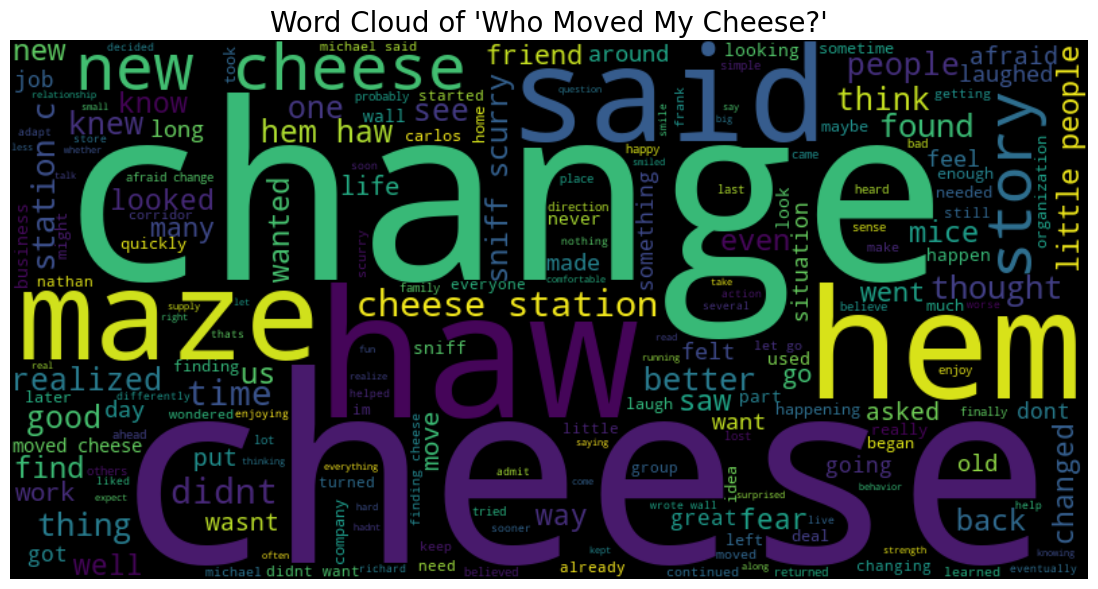

In [4]:
# Step 4: Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(cleaned_text)
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of 'Who Moved My Cheese?'", fontsize=20)
plt.show()

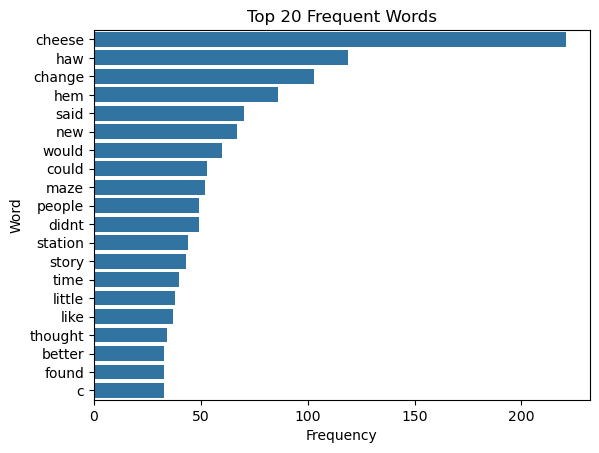

In [5]:
# Step 5: Frequent Words
from collections import Counter
tokens = word_tokenize(cleaned_text)
word_freq = Counter(tokens)
df_freq = pd.DataFrame(word_freq.most_common(20), columns=['Word', 'Frequency'])
sns.barplot(data=df_freq, x='Frequency', y='Word')
plt.title("Top 20 Frequent Words")
plt.show()

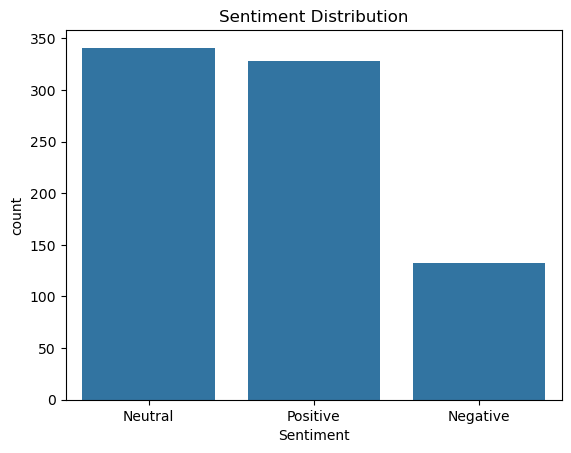

In [6]:
# Step 6: Sentiment Analysis
sentences = sent_tokenize(raw_text)
sentiment_data = pd.DataFrame(sentences, columns=['Sentence'])
sentiment_data['Polarity'] = sentiment_data['Sentence'].apply(lambda x: TextBlob(x).sentiment.polarity)
sentiment_data['Sentiment'] = sentiment_data['Polarity'].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral'))
sns.countplot(data=sentiment_data, x='Sentiment')
plt.title("Sentiment Distribution")
plt.show()

In [7]:
# Step 7: Topic Modeling
vectorizer = CountVectorizer(max_df=0.9, min_df=5, stop_words='english')
X = vectorizer.fit_transform(sentences)
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X)
for i, topic in enumerate(lda.components_):
    print(f"\nTop 10 Words in Topic {i}:")
    print([vectorizer.get_feature_names_out()[j] for j in topic.argsort()[-10:]])


Top 10 Words in Topic 0:
['old', 'long', 'day', 'moved', 'hem', 'maze', 'haw', 'new', 'station', 'cheese']

Top 10 Words in Topic 1:
['going', 'afraid', 'know', 'want', 'asked', 'michael', 'think', 'did', 'said', 'didn']

Top 10 Words in Topic 2:
['mice', 'thought', 'wall', 'like', 'way', 'just', 'scurry', 'sniff', 'hem', 'haw']

Top 10 Words in Topic 3:
['carlos', 'realized', 'doing', 'better', 'story', 'change', 'little', 'things', 'said', 'people']

Top 10 Words in Topic 4:
['used', 'helped', 'work', 'life', 'better', 'good', 'cheese', 'time', 'new', 'change']


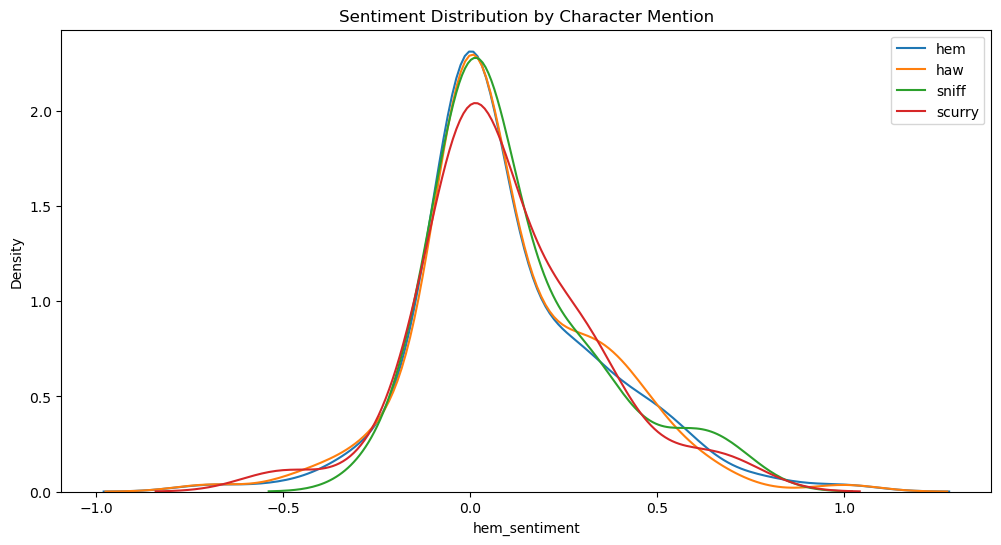

In [8]:
# Step 8: Character Emotion Tracking
character_mentions = ['hem', 'haw', 'sniff', 'scurry']
char_df = pd.DataFrame()
for char in character_mentions:
    char_df[char] = sentiment_data['Sentence'].str.contains(char, case=False)
    char_df[f'{char}_sentiment'] = sentiment_data['Polarity'][char_df[char]].reset_index(drop=True)

plt.figure(figsize=(12, 6))
for char in character_mentions:
    sns.kdeplot(char_df[f'{char}_sentiment'].dropna(), label=char)
plt.title("Sentiment Distribution by Character Mention")
plt.legend()
plt.show()

In [9]:
# Step 9: Summary Insights
print("🔹 Overall Sentiment Score:", round(sentiment_data['Polarity'].mean(), 3))
print("\n🔹 Most Positive Sentence:\n", sentiment_data.loc[sentiment_data['Polarity'].idxmax(), 'Sentence'])
print("\n🔹 Most Negative Sentence:\n", sentiment_data.loc[sentiment_data['Polarity'].idxmin(), 'Sentence'])

🔹 Overall Sentiment Score: 0.091

🔹 Most Positive Sentence:
 The Maze was a labyrinth of corridors and chambers, some containing
delicious cheese.

🔹 Most Negative Sentence:
 You did not need to overcomplicate matters or confuse yourself with fearful
beliefs.


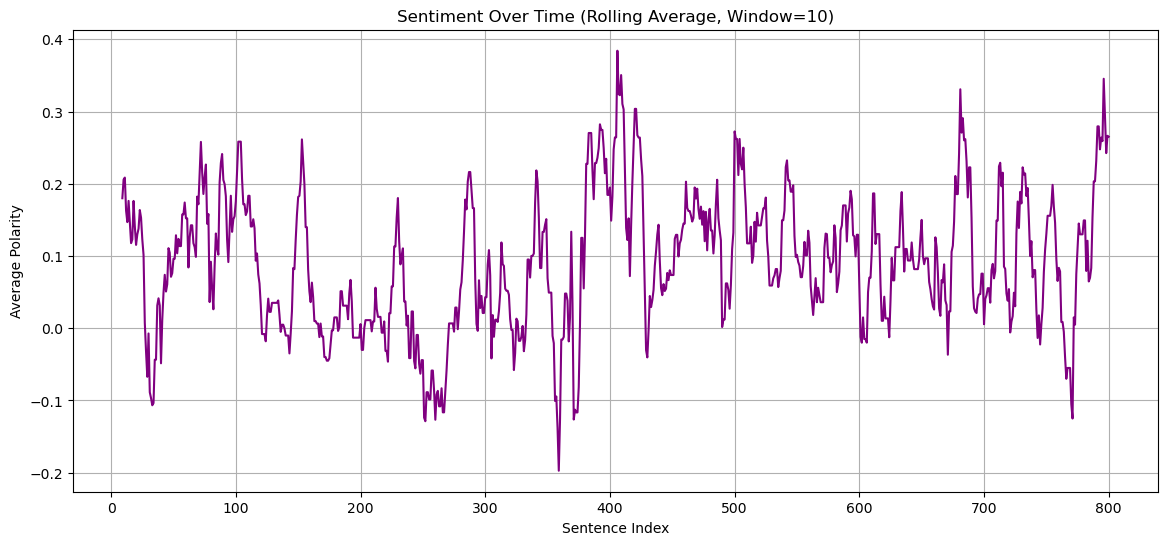

In [10]:
# Step 10: Sentiment Over Time (Moving Sentiment Plot)
# Rolling average sentiment over sentences
window_size = 10
sentiment_data['Rolling_Polarity'] = sentiment_data['Polarity'].rolling(window=window_size).mean()

plt.figure(figsize=(14, 6))
plt.plot(sentiment_data['Rolling_Polarity'], color='purple')
plt.title(f"Sentiment Over Time (Rolling Average, Window={window_size})")
plt.xlabel("Sentence Index")
plt.ylabel("Average Polarity")
plt.grid(True)
plt.show()


In [11]:
# Step 11: Emotion Detection (NRC Lexicon)

!pip install nrclex
from nrclex import NRCLex

emotion_sentences = sentiment_data['Sentence'].sample(10, random_state=42)

for i, sentence in enumerate(emotion_sentences):
    emotions = NRCLex(sentence).top_emotions
    print(f"\n🧠 Sentence {i+1}: {sentence}")
    print("Emotions:", emotions)



🧠 Sentence 1: I think my current
relationship is 'Old Cheese' that has some pretty serious mold on it."
Emotions: [('trust', 0.25), ('positive', 0.25), ('joy', 0.25), ('anticipation', 0.25)]

🧠 Sentence 2: Because they
understood human nature, they helped us paint a realistic vision of New
Cheese that made good sense to practically everyone.
Emotions: [('positive', 0.375)]

🧠 Sentence 3: But if you looked closely enough, you could discover the most
amazing things!
Emotions: [('fear', 0.0), ('anger', 0.0), ('anticip', 0.0), ('trust', 0.0), ('surprise', 0.0), ('positive', 0.0), ('negative', 0.0), ('sadness', 0.0), ('disgust', 0.0), ('joy', 0.0)]

🧠 Sentence 4: The truth is, I
didn't want to deal with the change.
Emotions: [('trust', 0.25), ('positive', 0.25)]

🧠 Sentence 5: Sniff and Scurry, possessing simple brains and good instincts,
searched for the hard nibbling cheese they liked, as mice often do.
Emotions: [('positive', 0.3333333333333333)]

🧠 Sentence 6: Then Nathan said quietly,

In [12]:
# Step 12: Dialogue Attribution (Who Said What?)

# Assuming character mentions followed by speech markers
dialogue_data = []
pattern = re.compile(r"(hem|haw|sniff|scurry)[^\.!?]*[\.!?]", re.IGNORECASE)

for match in pattern.finditer(raw_text):
    speaker = match.group(1).capitalize()
    dialogue = match.group(0)
    dialogue_data.append((speaker, dialogue.strip()))

df_dialogue = pd.DataFrame(dialogue_data, columns=["Character", "Dialogue"])
print("\n🗣️ Sample Dialogues by Characters:\n")
print(df_dialogue.head())



🗣️ Sample Dialogues by Characters:

  Character                                           Dialogue
0       Hem                           hem and make them happy.
1     Sniff                                  Sniff and Scurry.
2       Hem                                      Hem and\nHaw.
3       Hem  hem deals with it successfully, and writes wha...
4     Sniff  Sniff" and "Scurry;' and\nthe Little people: "...


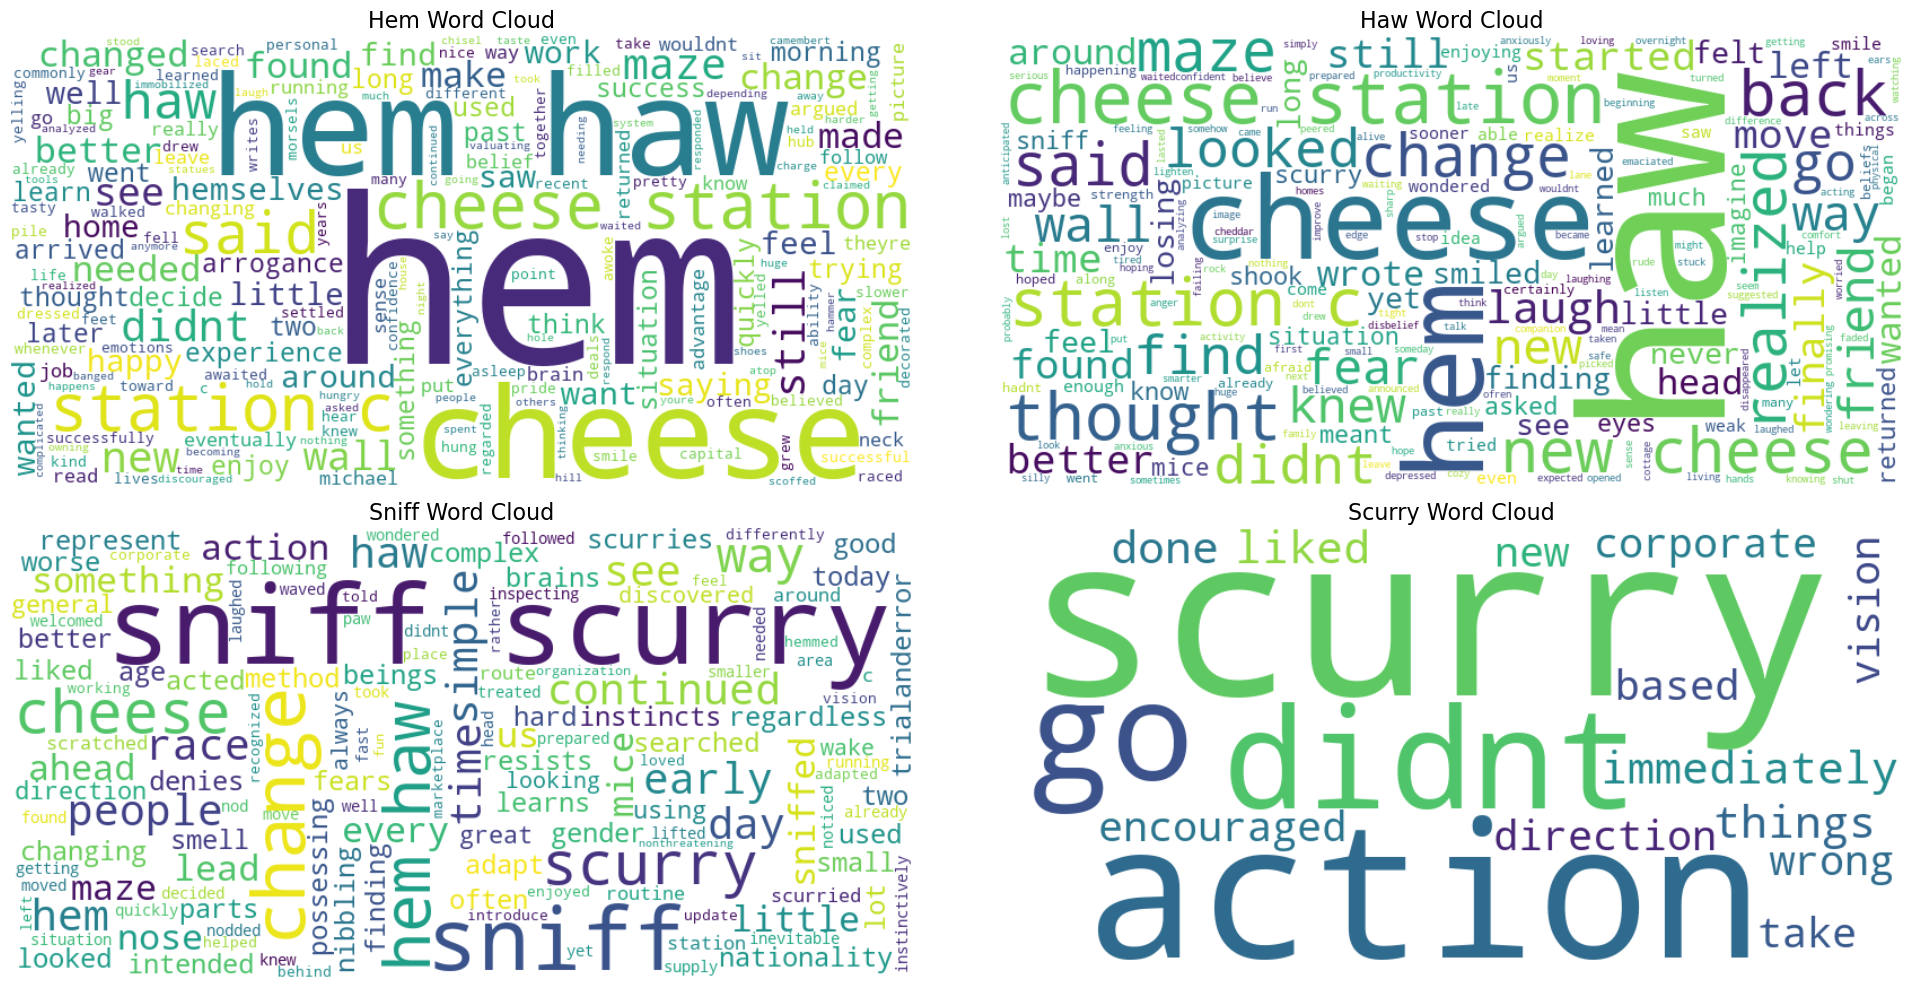

In [13]:
# Step 13: Character-specific Word Clouds

char_clouds = {}
for character in character_mentions:
    char_lines = df_dialogue[df_dialogue['Character'].str.lower() == character]['Dialogue']
    if not char_lines.empty:
        text = preprocess_text(' '.join(char_lines))
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
        char_clouds[character] = wordcloud

plt.figure(figsize=(20, 10))
for i, (character, wc) in enumerate(char_clouds.items()):
    plt.subplot(2, 2, i + 1)
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"{character.capitalize()} Word Cloud", fontsize=16)
plt.tight_layout()
plt.show()